In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:
refdf = pd.read_excel('reference_10cc.xlsx')

In [3]:
refdf = refdf.loc[~refdf.Group.isin(['Axenic'])]

In [4]:
refdf.head()

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C]
0,10A0,10,A,0,0,HOT5_F3,Marinovum 5F3,Weak,0.0,0.000000,0.061,1.430467,9.476845
1,10A0,10,A,0,0,HOT5_F3,Marinovum 5F3,Weak,93480.0,1.081944,0.088,2.063625,13.671514
2,10A0,10,A,0,0,HOT5_F3,Marinovum 5F3,Weak,187020.0,2.164583,0.121,2.837484,18.798332
3,10A0,10,A,0,0,HOT5_F3,Marinovum 5F3,Weak,237360.0,2.747222,0.189,4.432103,29.362685
4,10A0,10,A,0,0,HOT5_F3,Marinovum 5F3,Weak,324360.0,3.754167,0.275,6.448828,42.723483


In [5]:
refdf.describe()

,id,transfer,transfer day,t,day,FL,ref_Bp[N],ref_Bp[C]
count,1998.000000,1998.0,1998.0,1.998000e+03,1998.000000,1998.000000,1998.000000,1998.000000
mean,6.333333,0.0,0.0,4.287948e+06,49.629026,0.249843,5.858881,38.815088
std,2.982170,0.0,0.0,3.043224e+06,35.222497,0.489585,11.480917,76.061077
min,2.000000,0.0,0.0,0.000000e+00,0.000000,-0.052000,-1.219415,-8.078622
25%,4.000000,0.0,0.0,1.616700e+06,18.711806,0.043000,1.008362,6.680399
50%,6.000000,0.0,0.0,3.740850e+06,43.296875,0.095000,2.227777,14.759021
75%,9.000000,0.0,0.0,6.894300e+06,79.795139,0.228500,5.358389,35.499330
max,11.000000,0.0,0.0,1.112550e+07,128.767361,6.072667,142.405747,943.438071


In [6]:
refdf.columns

Index(['Sample', 'id', 'replicate', 'transfer', 'transfer day', 'heterotroph',
       'full name', 'Group', 't', 'day', 'FL', 'ref_Bp[N]', 'ref_Bp[C]'],
      dtype='object')

In [7]:
groupby_cols = [ 'id',  'heterotroph',
       'full name',  'Group',  't', 'day',]

refdf_samples = refdf.groupby(groupby_cols).sample(50, replace=True, random_state=12345)
refdf_samples['sample_number'] = refdf_samples.groupby(groupby_cols).cumcount()

In [8]:
refdf_samples['shuffle_id'] = refdf_samples['id'].astype(str) + '_' + refdf_samples['sample_number'].astype(str)

In [9]:
refdf_samples[['shuffle_id']].value_counts()

shuffle_id
10_0          74
6_42          74
6_15          74
6_14          74
6_13          74
              ..
2_6           74
2_5           74
2_49          74
2_48          74
9_9           74
Name: count, Length: 450, dtype: int64

In [10]:
refdf_samples['id'].value_counts()

id
2     3700
3     3700
4     3700
5     3700
6     3700
7     3700
9     3700
10    3700
11    3700
Name: count, dtype: int64

In [11]:
refdf.id.value_counts()

id
10    222
11    222
2     222
3     222
4     222
5     222
6     222
7     222
9     222
Name: count, dtype: int64

In [12]:
refdf_samples

,Sample,id,replicate,transfer,transfer day,heterotroph,full name,Group,t,day,FL,ref_Bp[N],ref_Bp[C],sample_number,shuffle_id
814,2C0,2,C,0,0,HOT1A3,A. macleodii 1A3,Strong,0.0,0.000000,0.118,2.767133,18.332258,0,2_0
740,2B0,2,B,0,0,HOT1A3,A. macleodii 1A3,Strong,0.0,0.000000,0.102,2.391929,15.846528,1,2_1
740,2B0,2,B,0,0,HOT1A3,A. macleodii 1A3,Strong,0.0,0.000000,0.102,2.391929,15.846528,2,2_2
740,2B0,2,B,0,0,HOT1A3,A. macleodii 1A3,Strong,0.0,0.000000,0.102,2.391929,15.846528,3,2_3
666,2A0,2,A,0,0,HOT1A3,A. macleodii 1A3,Strong,0.0,0.000000,0.136,3.189238,21.128704,4,2_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,11B0,11,B,0,0,HOT5_C3,Roseovarius 5C3,Weak,11125500.0,128.767361,0.019,0.445555,2.951804,45,11_45
443,11C0,11,C,0,0,HOT5_C3,Roseovarius 5C3,Weak,11125500.0,128.767361,0.057,1.336666,8.855413,46,11_46
443,11C0,11,C,0,0,HOT5_C3,Roseovarius 5C3,Weak,11125500.0,128.767361,0.057,1.336666,8.855413,47,11_47
443,11C0,11,C,0,0,HOT5_C3,Roseovarius 5C3,Weak,11125500.0,128.767361,0.057,1.336666,8.855413,48,11_48


In [13]:
prefdf_samples = refdf_samples.pivot(index=['shuffle_id', 'id'], values=['ref_Bp[N]','ref_Bp[C]'], columns='day')
prefdf_samples.columns = [f'{col}_{day:2.2f}' for col,day in prefdf_samples.columns.values]
X = prefdf_samples
y = prefdf_samples.index.get_level_values(1)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=345)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((270, 148), (270,), (180, 148), (180,))

# logistic regression

In [15]:
# Logistic Regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# fit a logistic regression model to the data
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)
print(clf)

# make predictions
expected = y_test
predicted = clf.predict(X_test)
# summarize the fit of the model
print(clf.score(X_train, y_train), clf.score(X_test, y_test))
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

LogisticRegression(max_iter=10000)
1.0 0.9888888888888889
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        16
           5       1.00      0.89      0.94        19
           6       1.00      1.00      1.00        24
           7       0.94      1.00      0.97        16
           9       0.95      1.00      0.98        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        19

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

[[24  0  0  0  0  0  0  0  0]
 [ 0 22  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0]
 [ 0  0  0 17  0  1  1  0  0]
 [ 0  0  0  0 24  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0 20  0  0]
 [ 0  0  0  0  0  0  0 20  

In [20]:
predicted = clf.predict_proba(X_test)


In [22]:
clf.classes_

array([ 2,  3,  4,  5,  6,  7,  9, 10, 11], dtype=int64)

In [25]:
df_predicted = pd.DataFrame(predicted, columns=clf.classes_)
df_predicted['y'] = y_test
df_predicted

,2,3,4,5,6,7,9,10,11,y
0,2.160262e-10,2.144723e-06,1.213953e-07,5.036573e-09,9.471136e-06,2.689904e-08,1.621777e-06,1.131455e-04,9.998735e-01,11
1,9.999913e-01,5.926609e-22,4.172669e-120,8.717653e-06,5.128707e-28,9.174895e-11,3.723475e-31,1.092709e-62,1.988195e-117,2
2,6.173688e-06,7.663384e-05,2.487754e-27,6.520008e-07,2.892288e-04,9.996273e-01,1.511519e-11,1.003012e-16,3.565021e-18,7
3,3.214887e-07,5.531034e-06,7.663906e-30,1.461968e-07,9.148744e-06,9.999849e-01,5.944480e-13,2.718229e-15,1.571010e-20,7
4,7.144356e-11,1.100179e-06,1.491966e-07,3.923753e-09,1.070847e-05,1.093830e-07,4.886415e-06,6.261165e-05,9.999204e-01,11
...,...,...,...,...,...,...,...,...,...,...
175,9.509978e-09,3.256724e-08,1.501267e-10,6.523456e-07,1.234014e-03,3.800742e-08,9.777353e-01,8.358085e-04,2.019418e-02,9
176,2.836145e-19,5.459265e-26,4.126727e-30,5.474193e-16,2.357203e-08,1.106942e-20,9.999999e-01,5.368805e-08,1.109886e-09,9
177,5.283811e-13,4.062862e-05,9.999529e-01,5.287511e-12,1.075283e-10,5.244604e-10,1.438656e-14,1.306493e-06,5.198555e-06,4
178,3.495481e-09,9.999061e-01,5.050106e-05,7.297777e-09,1.389850e-06,3.831314e-06,8.431610e-12,4.142747e-07,3.772680e-05,3


In [32]:
mdf_predicted = df_predicted.melt(id_vars='y', var_name='predicted', value_name='prob')

In [34]:
mdf_predicted['predicted_correctly'] = mdf_predicted['y'] == mdf_predicted['predicted']

In [30]:
class_ = 2
#CalibrationDisplay(y_test==class_, df_predicted[class_],)
from sklearn.calibration import calibration_curve
calibration_curve(y_test==class_, df_predicted[class_], pos_label=True, strategy='quantile')

(array([0.        , 0.        , 0.        , 0.        , 0.66666667]),
 array([5.47840119e-13, 4.60323652e-10, 2.18079889e-08, 6.52827914e-07,
        6.82957421e-01]))

C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Osnat\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

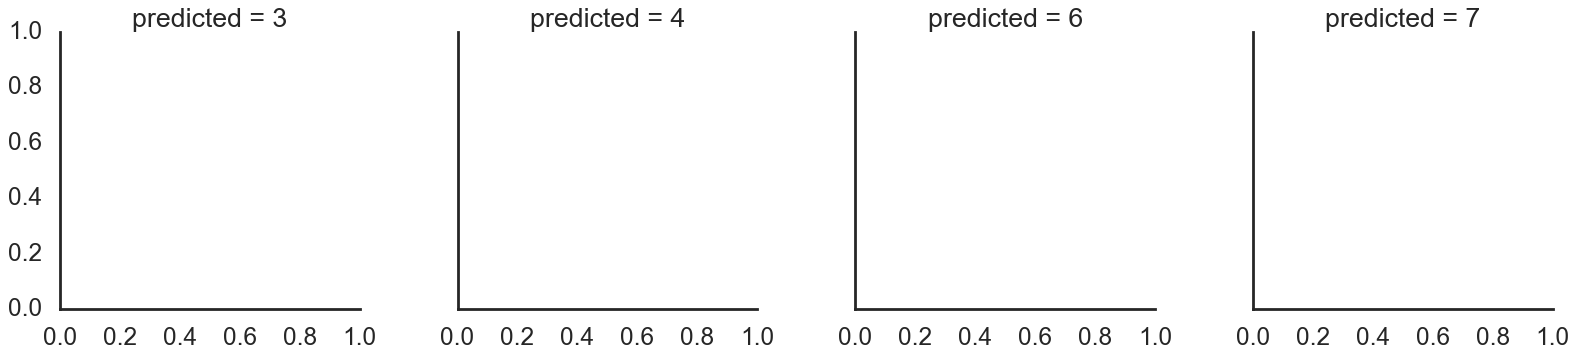

In [36]:
sns.displot(data=mdf_predicted.loc[mdf_predicted.predicted.isin([3,4,7,6])], 
            x='prob',
            col='predicted',
            hue='predicted_correctly',
            col_wrap=5,
           )

In [ ]:
import sklearn
sklearn.__version__

ValueError: Expected 'estimator' to be a binary classifier. Got 9 classes instead.

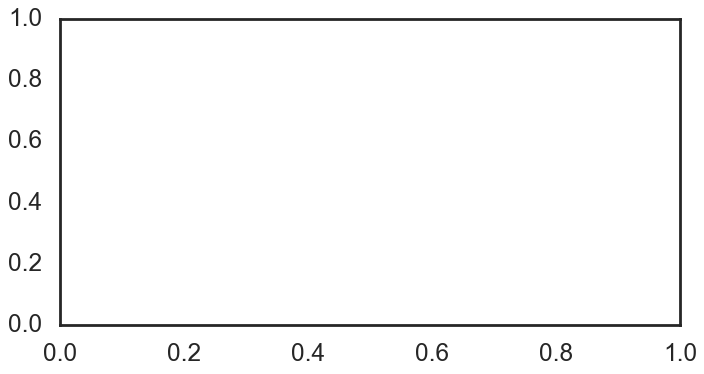

In [19]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
clf_list = [(clf, 'logistic')]
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
#     display = CalibrationDisplay.from_estimator(
#         clf, 
#         X_test,
#         y_test,
#         n_bins=10,
#         name=name,
#         ax=ax_calibration_curve,
#         color=colors(i),
#         pos_label=2,
#     )
#     calibration_displays[name] = display

# ax_calibration_curve.grid()
# ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(
        [row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()